In [1]:
from collections import Counter
import pickle
import sentencepiece as spm
from matplotlib import pyplot as plt
import re

In [2]:
def sentence_piece(vocab_path):
    sp = spm.SentencePieceProcessor()
    sp.Load(vocab_path)
    n_words = len(sp)
    return sp, n_words

In [3]:
def calc_unk(unk_uttrs, vocab_path):
    s = r"[！”＃＄％＆’（）＝～｜‘｛＋＊｝＜＞？＿－＾￥＠「；：」、。・\\p{Punct}]*"
    sp, _ = sentence_piece(vocab_path)
    unk_uttrs = unk_uttrs
    uttr_decode = [sp.DecodeIds(sp.EncodeAsIds(uttr)) for uttr in unk_uttrs]
    print(len(unk_uttrs), len(uttr_decode))
    #unk_word = [[ud for ud in unk_uttrs[i] if ud not in uu and not re.search(ud, s)] for i, uu in enumerate(uttr_decode)]
    unk_word = []
    [[unk_word.append(ud.strip("[！,？]*")) for ud in unk_uttrs[i] if ud not in uu and ud.strip("[！,？,!,?]*") != ""] for i, uu in enumerate(uttr_decode)]
    return unk_word

In [4]:
def vocab_count(dial_path, vocab_path):
    f_dial = open(dial_path, 'r')
    dial = f_dial.readlines()[:100000]
    sp, n_words = sentence_piece(vocab_path)
    uttrs = []
    [uttrs.append(i) for j in dial for i in j.strip().split('\t')]
    data = [sp.EncodeAsIds(i) for i in uttrs]
    dial_vocab = []
    unk_vocab = []
    [[dial_vocab.append(i) if i != 3 else (dial_vocab.append(i),unk_vocab.append(uttrs[n])) for i in j] for n, j in enumerate(data)]
    #try:
    unk_words = calc_unk(unk_vocab, vocab_path)
    #except:
    #    unk_words = 0
    c = Counter(dial_vocab)
    words_len = sum(c.values())
    words_rate = [c[i]/words_len for i in range(n_words)]
    #unk_len = c[3]
    return c, n_words, words_len, unk_words, unk_vocab, words_rate

In [5]:
def calc_cover1(unk_words, word_len):
    return 1.0 - len(unk_words)/word_len

In [6]:
def calc_cover2(c1, c2, word_len):  
    return 1.0 - len(unk_words)/word_len

In [7]:
dial_path1 = "../data/em_dial/splitted/cleaning/train_dial.txt"
dial_path1a = "../data/em_dial/splitted/all/train_dial.txt"
dial_path2 = "../data/op_sub_dial/splitted/train_dial.txt"
dial_path3 = "../data/twitter_dial/splitted/train_dial.txt"
vocab_path1 = "../data/twitter_dial/vocab/spvocab.model"
vocab_path2 =  "../data/op_sub_dial/vocab/spvocab.model"
c11, n11, w11, u11, uv11, wr11 = vocab_count(dial_path1, vocab_path1)
c12, n12, w12, u12, uv12, wr12 = vocab_count(dial_path1, vocab_path2)
c1a1, n1a1, w1a1, u1a1, uv1a1, wr1a1 = vocab_count(dial_path1a, vocab_path1)
c1a2, n1a2, w1a2, u1a2, uv1a2, wr1a2 = vocab_count(dial_path1a, vocab_path2)

3 3
1050 1050
35 35
5713 5713


In [11]:
c21, n21, w21, u21, uv21, wr21 = vocab_count(dial_path2, vocab_path1)
c22, n22, w22, u22, uv22, wr22 = vocab_count(dial_path2, vocab_path2)

1465 1465
1279 1279


In [18]:
c31, n31, w31, u31, uv31, wr31 = vocab_count(dial_path3, vocab_path1)

1834 1834


0.036347775516138416

In [483]:
print(w11,w12,w1a1,w1a2,w21,w22,w31)

24073 23940 115093 115013 1183464 999684 1897317


In [482]:
print(calc_cover(uv11,w11))
print(calc_cover(uv12,w12))
print(calc_cover(uv1a1,w1a1))
print(calc_cover(uv1a2,w1a2))
print(calc_cover(uv21,w21))
print(calc_cover(uv22,w22))
print(calc_cover(uv31,w31))

0.9997092177958709
0.9634920634920635
0.999626389094037
0.9609435455122465
0.9987621085221012
0.9987205957082438
0.9990333718614233


In [437]:
cu12 = Counter(u12)
cu11 = Counter(u11)

In [425]:
sum(cu12.values())

1200

In [453]:
len([u.strip("[！,？]*")  for u in u12 if u.strip("[！,？,!,?]*") != ""])

189

In [69]:
wr1a1[]

[0.0, 0.0, 0.0, 0.0002886931274538916, 0.051981259691840705]

In [506]:
c11[31998]

473

In [505]:
c21[31995]

0

In [498]:
sp_op, _  = sentence_piece(vocab_path1)
sp.EncodeAsIds("!")
#sp.DecodeIds([31995, 31998])

[4, 31995]

In [181]:
c3, n3, w3, u3, wr3 = vocab_count(dial_path3, vocab_path1)

In [210]:
print(re.search("？", "[！,？]"))

<_sre.SRE_Match object; span=(3, 4), match='？'>


In [473]:
uv31[:50]

['たかせも苫小牧くるって',
 'ほわほわ〜〜 ˙Ꙫ˙',
 ' だから 斑目 貘だって´ω｀ﾌﾞﾌｫwww',
 ' だから 斑目 貘だって´ω｀ﾌﾞﾌｫwww',
 'あるあるだね 持ってる人は持ってるということか…▂▅▇█▓▒░’ω’░▒▓█▇▅▂うわあああああ',
 'あるあるだね 持ってる人は持ってるということか…▂▅▇█▓▒░’ω’░▒▓█▇▅▂うわあああああ',
 'あるあるだね 持ってる人は持ってるということか…▂▅▇█▓▒░’ω’░▒▓█▇▅▂うわあああああ',
 'あるあるだね 持ってる人は持ってるということか…▂▅▇█▓▒░’ω’░▒▓█▇▅▂うわあああああ',
 '怜乎が可愛くてつい…',
 '伶さんの先生ですか',
 'おう アヘ顏ダブルピースの顔文字化の煽り',
 '뭔가 특산물 느낌 가득이에요',
 '뭔가 특산물 느낌 가득이에요',
 '뭔가 특산물 느낌 가득이에요',
 '뭔가 특산물 느낌 가득이에요',
 'ラーメンは全然わからないミャオ…橿原周辺ミャオ',
 'お恥ずかしいですがその通りです️ ⍨ ️',
 'どうなんだろうww 割と20代と10代の折衷かもよww',
 '疚しいこと考えてそう',
 '優斗ありがとーっプレゼントが今届いた〜 母カンゲキっ 大切に着るね♡ •·τнänκ чöü·•๑ºั╰╯ºั๑ 愛してるよ…',
 '優斗ありがとーっプレゼントが今届いた〜 母カンゲキっ 大切に着るね♡ •·τнänκ чöü·•๑ºั╰╯ºั๑ 愛してるよ…',
 '優斗ありがとーっプレゼントが今届いた〜 母カンゲキっ 大切に着るね♡ •·τнänκ чöü·•๑ºั╰╯ºั๑ 愛してるよ…',
 '優斗ありがとーっプレゼントが今届いた〜 母カンゲキっ 大切に着るね♡ •·τнänκ чöü·•๑ºั╰╯ºั๑ 愛してるよ…',
 ' あ、二宮くんだ お迎えありがとうね いやー 、嬉しいなぁ ♚',
 'はい。たぶん、それで地面のパースと比較して辻褄が合わなくなってるんだと思います',
 '禮の言う通りだよ。本当紙一重だよな。要らん事って笑賑やかなの俺、いきなりそんな所お邪魔して大丈夫かな禮がキリンさんになる前になるべく行きたいと思います。',
 '禮の言う通りだよ。本当紙一重だよな。要らん事って笑賑やかなの俺、いき

In [222]:
def calc_cover(unk_words, word_len):
    return 1.0 - len(unk_words)/word_len

In [224]:
print(calc_cover(u1,w1))
print(calc_cover(u2,w2))
print(calc_cover(u3,w3))

0.9997091332169866
0.9987621085221012
0.9991926090217166


In [146]:
sp, _ = sentence_piece(vocab_path)
sp.EncodeAsIds(u1[0])

[16907, 2640, 3, 6414, 4078, 391, 6]

# Plot word rate

In [11]:
#for i wr in range enumerate(wr1):
import numpy as np

def graph_plot(word_rate, n_word, co, max_y):
    x = np.arange(0, n_word-4, 1)
    y = np.array(word_rate[4:])
    plt.bar(x,y, color=co)
    plt.title("Frequency of occurrence of token")
    plt.xlabel("token id")
    plt.ylabel("frequency of appearance")
    plt.ylim(0,max_y)
    plt.show
    
def graph_plot(word_rate, n_word, co, max_y):
    x = np.arange(0, n_word-4, 1)
    y = np.array(word_rate[4:])
    plt.bar(x,y, color=co)
    plt.title("")
    plt.ylim(0,max_y)
    plt.show

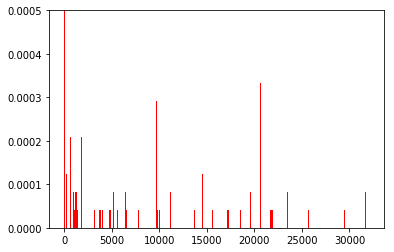

In [24]:
graph_plot(wr1, n1, 'r', 0.0005)

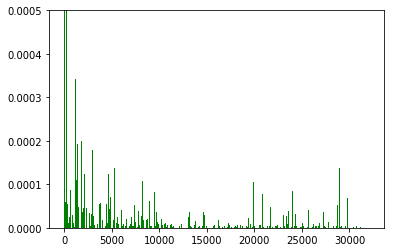

In [107]:
graph_plot(wr2, n2, 'g', 0.0005)

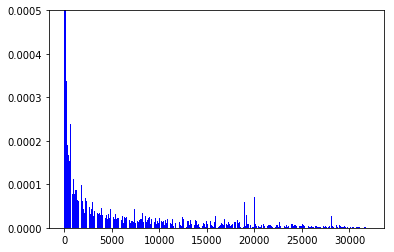

In [108]:
graph_plot(wr3, n3, 'b', 0.0005) 

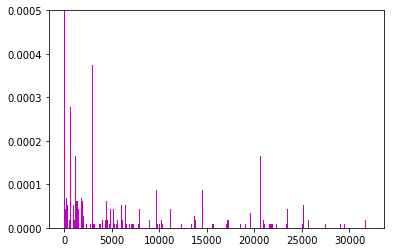

In [486]:
graph_plot(wr1a1, n1a1, 'm', 0.0005) 

# Freqency word 

In [8]:
def calc_freq(count, vocab_path, num=20):
    sp = spm.SentencePieceProcessor()
    sp.Load(vocab_path)
    freq_id = [i[0] for i in count.most_common(num)]
    num_freq = [i[1] for i in count.most_common(num)]
    rare_id = [i[0] for i in count.most_common()[-1:-num-1:-1]]
    num_rare = [i[1] for i in count.most_common()[-1:-num-1:-1]]
    freq_word = [sp.DecodeIds([i]) for i in freq_id]
    rare_word = [sp.DecodeIds([i]) for i in rare_id]
    print("*** Frequency words ***")
    for i in range(num):
        print("id={} word=「{}」 freq={}".format(freq_id[i], freq_word[i], num_freq[i]))
    print("*** Rare words ***")
    for i in range(num):
        print("id={} word=「{}」 freq={}".format(rare_id[i], rare_word[i], num_rare[i]))
    return freq_id, num_freq, freq_word

In [17]:
fre1_id, fre1_n, fre_w = calc_freq(c11, vocab_path1, num=500)

*** Frequency words ***
id=6 word=「。」 freq=2619
id=4 word=「」 freq=1421
id=5 word=「、」 freq=1003
id=31998 word=「?」 freq=556
id=4996 word=「掃除」 freq=492
id=31995 word=「!」 freq=381
id=23 word=「を」 freq=365
id=22 word=「よ」 freq=356
id=11 word=「が」 freq=314
id=8 word=「の」 freq=214
id=9 word=「は」 freq=214
id=16 word=「も」 freq=198
id=12 word=「に」 freq=171
id=27 word=「から」 freq=149
id=1971 word=「部屋」 freq=144
id=29 word=「です」 freq=130
id=15 word=「と」 freq=106
id=397 word=「A」 freq=103
id=21 word=「ね」 freq=99
id=69 word=「だよ」 freq=96
id=18 word=「な」 freq=90
id=26 word=「って」 freq=90
id=64 word=「だから」 freq=88
id=32 word=「し」 freq=76
id=16332 word=「ロボット」 freq=74
id=38 word=「さん」 freq=71
id=25 word=「か」 freq=70
id=10 word=「で」 freq=66
id=4914 word=「汚い」 freq=66
id=7 word=「...」 freq=65
id=13983 word=「汚れ」 freq=64
id=257 word=「じゃあ」 freq=63
id=6662 word=「片付け」 freq=59
id=52 word=「て」 freq=58
id=1586 word=「生活」 freq=55
id=284 word=「んだよ」 freq=54
id=31146 word=「埃」 freq=49
id=61 word=「なら」 freq=48
id=2905 word=「めんどくさい」 freq=48
id=60 

In [123]:
fre1a_id, fre1a_n, frea_w = calc_freq(c1a1, vocab_path1, num=100)

*** Frequency words ***
id=6 word=「。」 freq=11586
id=4 word=「」 freq=6302
id=5 word=「、」 freq=5201
id=31998 word=「?」 freq=2689
id=31995 word=「!」 freq=2143
id=22 word=「よ」 freq=1955
id=23 word=「を」 freq=1348
id=9 word=「は」 freq=1156
id=11 word=「が」 freq=1067
id=8 word=「の」 freq=968
id=16 word=「も」 freq=803
id=12 word=「に」 freq=675
id=27 word=「から」 freq=650
id=29 word=「です」 freq=578
id=15 word=「と」 freq=576
id=4996 word=「掃除」 freq=496
id=397 word=「A」 freq=489
id=69 word=「だよ」 freq=443
id=18 word=「な」 freq=434
id=21 word=「ね」 freq=417
id=3873 word=「運動」 freq=416
id=7 word=「...」 freq=415
id=64 word=「だから」 freq=404
id=10 word=「で」 freq=387
id=26 word=「って」 freq=387
id=284 word=「んだよ」 freq=359
id=6419 word=「A」 freq=340
id=16332 word=「ロボット」 freq=324
id=38 word=「さん」 freq=322
id=96 word=「うん」 freq=305
id=257 word=「じゃあ」 freq=305
id=32 word=「し」 freq=291
id=25 word=「か」 freq=275
id=448 word=「ゲーム」 freq=260
id=615 word=「でも」 freq=256
id=124 word=「んだ」 freq=249
id=1007 word=「食べ」 freq=247
id=39 word=「でも」 freq=246
id=4986 word=

In [124]:
c31[31995]

79

In [117]:
fre2_id, fre2_n, fre2_w = calc_freq(c21, vocab_path1, num=500)

*** Frequency words ***
id=4 word=「」 freq=111910
id=9104 word=「]」 freq=20863
id=23 word=「を」 freq=20508
id=8 word=「の」 freq=19841
id=9 word=「は」 freq=17622
id=5 word=「、」 freq=14961
id=71 word=「人」 freq=13951
id=11 word=「が」 freq=13452
id=21793 word=「[」 freq=12961
id=635 word=「名」 freq=12698
id=12 word=「に」 freq=11471
id=45 word=「だ」 freq=10902
id=6 word=「。」 freq=10149
id=659 word=「数」 freq=8531
id=30090 word=「詞」 freq=8455
id=22 word=「よ」 freq=8330
id=15239 word=「[」 freq=7902
id=15 word=「と」 freq=6822
id=10 word=「で」 freq=5792
id=25 word=「か」 freq=5648
id=18 word=「な」 freq=5303
id=16 word=「も」 freq=5181
id=19 word=「ー」 freq=4760
id=24 word=「・」 freq=3909
id=21 word=「ね」 freq=3698
id=124 word=「んだ」 freq=3458
id=27 word=「から」 freq=3321
id=36 word=「・・・」 freq=3313
id=44 word=「わ」 freq=2813
id=26 word=「って」 freq=2773
id=29 word=「です」 freq=2585
id=100 word=「ぞ」 freq=2072
id=70 word=「さ」 freq=2045
id=63 word=「た」 freq=2010
id=48 word=「♪」 freq=1933
id=32 word=「し」 freq=1797
id=226 word=「へ」 freq=1686
id=92 word=「した」 freq=

In [118]:
fre3_id, fre3_n, fre3_w = calc_freq(c31, vocab_path1, num=500)

*** Frequency words ***
id=4 word=「」 freq=138608
id=5 word=「、」 freq=55393
id=6 word=「。」 freq=35672
id=7 word=「...」 freq=27115
id=8 word=「の」 freq=19051
id=9 word=「は」 freq=15649
id=11 word=「が」 freq=11687
id=10 word=「で」 freq=11568
id=13 word=「笑」 freq=11327
id=14 word=「́」 freq=10840
id=12 word=「に」 freq=10808
id=20 word=「w」 freq=9446
id=17 word=「ω」 freq=9425
id=15 word=「と」 freq=9041
id=16 word=「も」 freq=8957
id=18 word=「な」 freq=8431
id=19 word=「ー」 freq=8282
id=22 word=「よ」 freq=8129
id=21 word=「ね」 freq=7973
id=24 word=「・」 freq=7813
id=25 word=「か」 freq=6926
id=23 word=「を」 freq=6872
id=27 word=「から」 freq=6399
id=26 word=「って」 freq=6334
id=28 word=「〜」 freq=6163
id=30 word=「......」 freq=5170
id=34 word=「www」 freq=5095
id=36 word=「・・・」 freq=4959
id=31 word=「とか」 freq=4876
id=29 word=「です」 freq=4824
id=33 word=「～」 freq=4777
id=37 word=「っ」 freq=4683
id=32 word=「し」 freq=4347
id=38 word=「さん」 freq=4127
id=35 word=「ん」 freq=3916
id=40 word=「o」 freq=3732
id=43 word=「ww」 freq=3701
id=41 word=「♡」 freq=3597
id=4

In [119]:
#for i wr in range enumerate(wr1):
import numpy as np

def id_freq_list(freq_id, count):
    id_list = []
    for i in freq_id:
        id_list.append(count[i])
    return id_list

def graph_plot_coverage(fi,c_em,c_op,c_tw):
    
    y_op = id_freq_list(fi, c_op)
    y_tw = id_freq_list(fi, c_tw)
    x = np.arange(len(fi))
    y_em = id_freq_list(fi, c_em)
    w = 1/3
    plt.bar(x,y_em, width=w,label="emotion_dial",align="center", color="r")
    plt.bar(x+w,y_op, width=w,label="OpenSubtitles",align="center", color="g")
    plt.bar(x+w*2,y_tw, width=w,label="Twitter",align="center",color="y")
    plt.title("Frequency of occurrence of token")
    plt.xlabel("token")
    plt.ylabel("frequency of appearance")
    plt.legend(loc=1)

    #plt.ylim(0,0.05)
    plt.xlim(-1, 80)
    plt.figure()
    plt.show
    print("emotion_dial : ", sum(y_em))
    print("open_subtitle : ", sum(y_op))
    print("twitter_dial: ", sum(y_tw))

emotion_dial :  0.2654739516315285
open_subtitle :  0.15703725708460176
twitter_dial:  0.1336972155944421


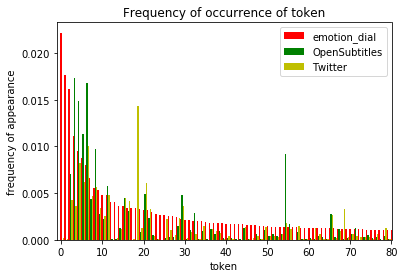

<Figure size 432x288 with 0 Axes>

In [125]:
graph_plot_coverage(fre1a_id[3:], wr1a1, wr21, wr31)

In [49]:
wr31

[0.0,
 0.0,
 0.0,
 0.0009666281385767376,
 0.07305473993012238,
 0.029195437557350722,
 0.01880128623735517,
 0.014291233357419978,
 0.01004102108398333,
 0.008247962781127244,
 0.006097030701775191,
 0.006159750848171392,
 0.005696465060925507,
 0.005970009228821541,
 0.005713330982645494,
 0.004765149945949992,
 0.004720876901435026,
 0.004967541006589832,
 0.0044436433131627455,
 0.004365111365154057,
 0.004978609267718573,
 0.004202249808545435,
 0.00428447117693037,
 0.003621956689367143,
 0.004117920199945502,
 0.003650417932269621,
 0.0033383983804498667,
 0.00337265728394359,
 0.003248271111258688,
 0.0025425376992879944,
 0.002724900477885351,
 0.002569944822082973,
 0.0022911300536494427,
 0.0025177658767617643,
 0.0026853709738541317,
 0.002063967170483372,
 0.0026136908065441883,
 0.002468222231709303,
 0.002175176841824534,
 0.0014905258320038243,
 0.0019669881205934487,
 0.0018958350133372547,
 0.0018331148669410542,
 0.0019506492589272115,
 0.001859994929682283,
 0.00182